In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem

DATA_FILE_HUMAN = "../../data/prolific/data_long.csv"
DATA_FILE_MODEL = "../../data/results/model_results_long.csv"

df_human = pd.read_csv(DATA_FILE_HUMAN)
df_model = pd.read_csv(DATA_FILE_MODEL)

from plot_utils import *

# only include cases for humans where scenario id = 0, 1, or 5
df_human = df_human[df_human["scenario_id"].isin([0, 1])]
# same for model
df_model = df_model[df_model["scenario_id"].isin([1, 2])]

In [146]:

def plot_model(data, plt_dir, palette):
    """
    """
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bar_width = 0.35
    error_bar_color = 'black'
    index = np.arange(len(data))
    
    for i, key in enumerate(data.keys()):
        # Calculate mean for '0' and '1' keys
        mean_0 = np.mean(data[key]['0'])
        mean_1 = np.mean(data[key]['1'])
        
        
        ax.bar(index[i] - bar_width / 2, mean_0, bar_width, label=f"{key} - 0", color=change_saturation(palette[6]))
        ax.bar(index[i] + bar_width / 2, mean_1, bar_width, label=f"{key} - 1", color=change_saturation(palette[8]))

    for patch in ax.patches:
        bb = patch.get_bbox()
        color = patch.get_facecolor()
        p_bbox = get_fancy_bbox(bb, "round,pad=-0.005,rounding_size=0.025", color, mutation_aspect=2)
        patch.remove()
        ax.add_patch(p_bbox)

   
    for i, bar in enumerate(ax.patches):
        lighter_bar_color = lighten_color(error_bar_color, 0.8)

        if i in [8, 9]: 
            workers_0 = {worker: [] for worker in data[key]['worker_ids']}
            workers_1 = {worker: [] for worker in data[key]['worker_ids']}
            
            for worker, rating in zip(data[key]['worker_ids'], data[key]['0']):
                workers_0[worker].append(rating)

            for worker, rating in zip(data[key]['worker_ids'], data[key]['1']):
                workers_1[worker].append(rating)

            # compute the sem across workers
            mean_0 = np.mean([np.mean(ratings) for ratings in workers_0.values()])
            mean_1 = np.mean([np.mean(ratings) for ratings in workers_1.values()])
            error_0 = sem([np.mean(ratings) for ratings in workers_0.values()])
            error_1 = sem([np.mean(ratings) for ratings in workers_1.values()])
          

        if i in [8]:
            ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=error_0, color=lighter_bar_color, capsize=1, ls='none', elinewidth=2, zorder=40)
        if i in [9]:
            ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=error_1, color=lighter_bar_color, capsize=1, ls='none', elinewidth=2, zorder=40)

    
    # Removing box
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.set_xticks(index)
    ax.set_xticklabels(['claude-2', 'claude-2-cot', 'gpt4t', 'gpt4-cot', 'human'], size=22)
    
    
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    ax.set_ylabel('Average Rating')
    ax.yaxis.set_label_coords(-0.05, 0.5)
    plt.tick_params(axis='y', length=0)
    plt.ylim(0.005, 5.5)
    fig.tight_layout()
    # save
    # plt.savefig(f'{plt_dir}.pdf')
    # plt.savefig(f'{plt_dir}.png', dpi=300)
    plt.show()

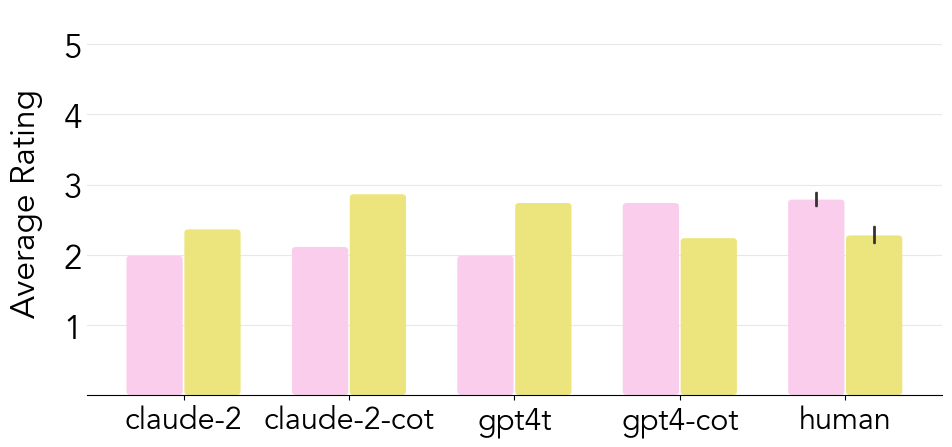

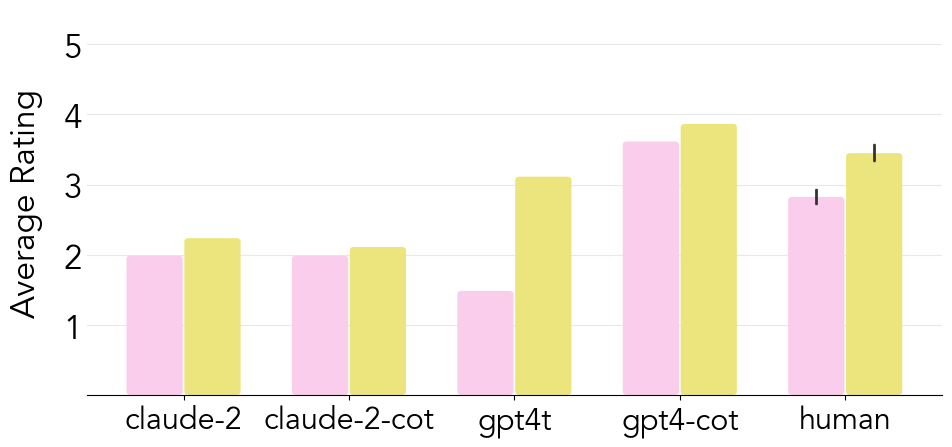

In [147]:
palette = sns.color_palette('colorblind')

# Prepare data for "means vs side_effect" for permissibility ratings
data1 = prepare_data(df_model, df_human, 'causal_structure', [0, 1], 'permissibility_rating')
plot_model(data1, 'plots/causal_structure_permissibility', palette)

# Prepare data for "action_yes vs prevention_no" for intention ratings
data2 = prepare_data(df_model, df_human, 'causal_structure', [0, 1], 'intention_rating')
plot_model(data2, 'plots/causal_structure_intention', palette)

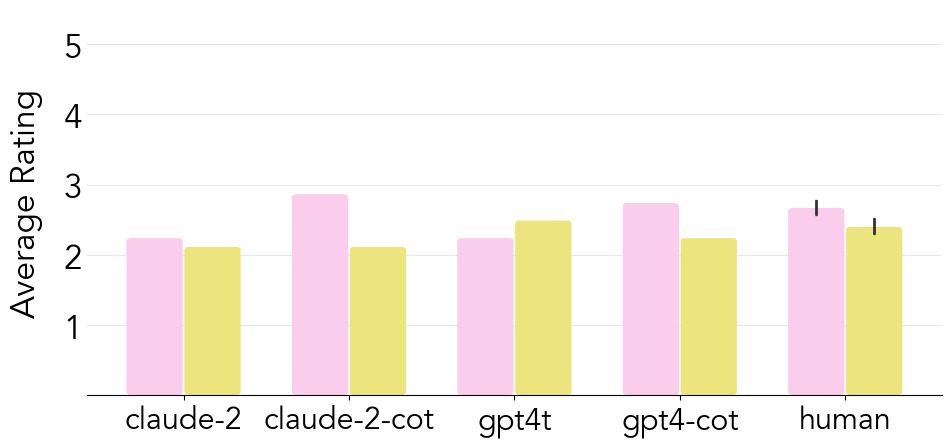

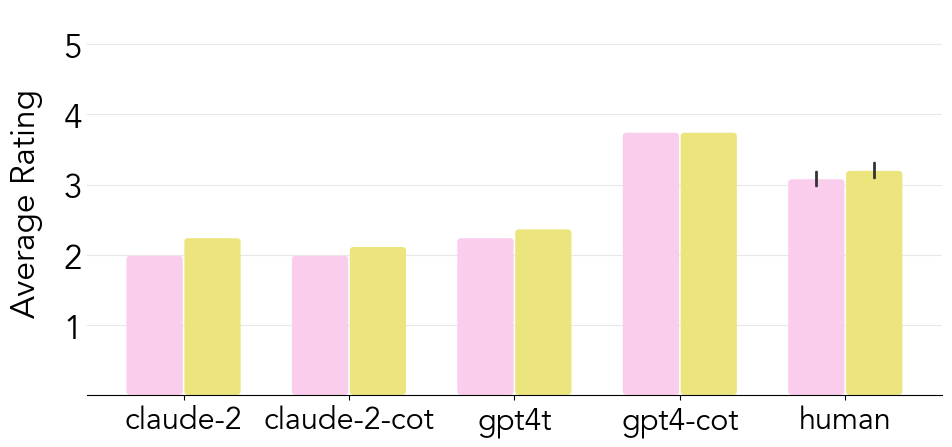

In [148]:
# Prepare data for "means vs side_effect" for permissibility ratings
palette = sns.color_palette('colorblind')

data1 = prepare_data(df_model, df_human, 'evitability', [0, 1], 'permissibility_rating')
plot_model(data1, 'plots/evitability_permissibility', palette)

# Prepare data for "action_yes vs prevention_no" for intention ratings
data2 = prepare_data(df_model, df_human, 'evitability', [0, 1], 'intention_rating')
plot_model(data2, 'plots/evitability_intention', palette)

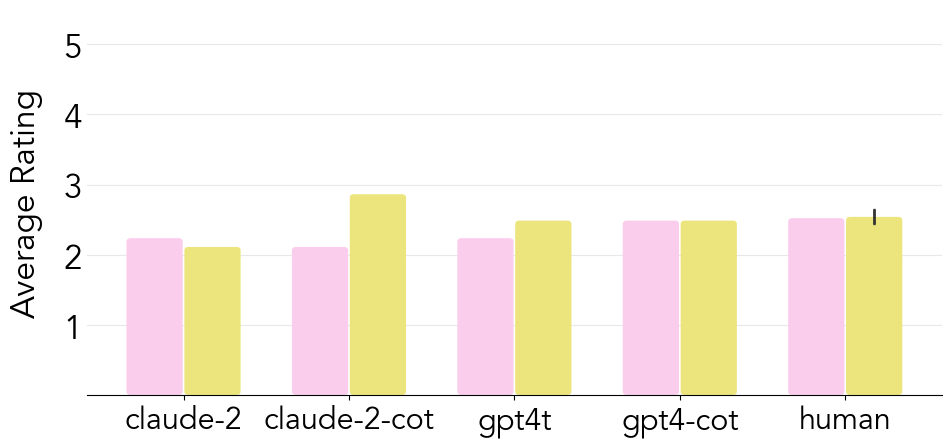

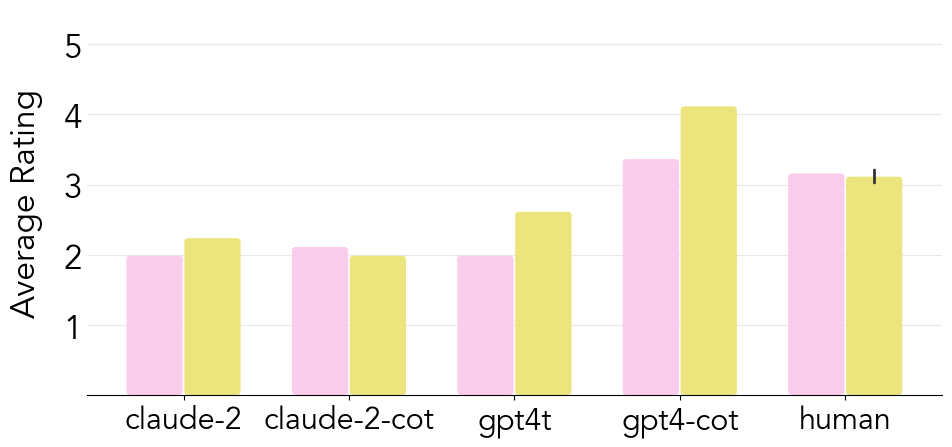

In [149]:
palette = sns.color_palette('colorblind')

# Prepare data for "means vs side_effect" for permissibility ratings
data1 = prepare_data(df_model, df_human, 'action', [0, 1], 'permissibility_rating')
plot_model(data1, 'plots/action_permissibility', palette)

# Prepare data for "action_yes vs prevention_no" for intention ratings
data2 = prepare_data(df_model, df_human, 'action', [0, 1], 'intention_rating')
plot_model(data2, 'plots/action_intention', palette)